<a href="https://colab.research.google.com/github/RMoulla/BDA/blob/main/R%C3%A9gression_Logistique_M%C3%A9t%C3%A9o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression logisitique sur des données météo
Dans ce TP, nous allons voir la mise en œuvre et l'interprétation de la régression logistique appliquée à des données météorologiques. L'objectif est d'expliquer et de prédire une variable une binaire relative à la pluie. Le dataset considéré contient des données journalières sur diverses variables, comme la température moyenne, l'humidité relative, la pression au niveau de la mer, etc. Notre variable cible est `pluie.demain`.


In [2]:
import pandas as pd

dataset = pd.read_csv('meteo.csv')
dataset.head()

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,...,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,1,2010,6,1,0,0,13.45,77.88,1015.76,0.1,...,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,True
1,3,2010,6,3,0,0,14.27,83.58,1016.39,0.0,...,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,False
2,5,2010,6,5,0,0,19.88,66.58,1018.18,0.0,...,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,True
3,7,2010,6,7,0,0,19.31,72.00,1013.60,0.4,...,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,True
4,9,2010,6,9,0,0,22.06,74.29,1005.01,2.0,...,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,False


## Prétraitement des données

Nous allons d'abord procéder au prétraitement du jeu de données. Cela inclut les étapes suivantes :

* Suppression des Colonnes Inutiles : En plus de la colonne Unnamed: 0, les colonnes "Hour", "Minute", "Day" et "Year" ont été éliminées car elles ne contribuent pas significativement à la prédiction de la pluie.

* Conversion de la Colonne Cible : La colonne pluie.demain a été convertie en format numérique (1 pour True, 0 pour False) pour faciliter la modélisation.

* Vérification des Valeurs Manquantes : Aucune valeur manquante n'a été détectée dans le dataset.*

In [3]:
# Suppression des colonnes inutiles
data_cleaned = dataset.drop(['Unnamed: 0', 'Hour', 'Minute', 'Day', 'Year'], axis=1)

# Conversion de la colonne cible en format numérique
data_cleaned['pluie.demain'] = data_cleaned['pluie.demain'].astype(int)

# Vérification des valeurs manquantes
missing_values = data_cleaned.isnull().sum()
print(missing_values)

# Affichage des premières lignes après le prétraitement
data_cleaned.head()


Month                                           0
Temperature.daily.mean..2.m.above.gnd.          0
Relative.Humidity.daily.mean..2.m.above.gnd.    0
Mean.Sea.Level.Pressure.daily.mean..MSL.        0
Total.Precipitation.daily.sum..sfc.             0
Snowfall.amount.raw.daily.sum..sfc.             0
Total.Cloud.Cover.daily.mean..sfc.              0
High.Cloud.Cover.daily.mean..high.cld.lay.      0
Medium.Cloud.Cover.daily.mean..mid.cld.lay.     0
Low.Cloud.Cover.daily.mean..low.cld.lay.        0
Sunshine.Duration.daily.sum..sfc.               0
Shortwave.Radiation.daily.sum..sfc.             0
Wind.Speed.daily.mean..10.m.above.gnd.          0
Wind.Direction.daily.mean..10.m.above.gnd.      0
Wind.Speed.daily.mean..80.m.above.gnd.          0
Wind.Direction.daily.mean..80.m.above.gnd.      0
Wind.Speed.daily.mean..900.mb.                  0
Wind.Direction.daily.mean..900.mb.              0
Wind.Gust.daily.mean..sfc.                      0
Temperature.daily.max..2.m.above.gnd.           0


,Month,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,...,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,6,13.45,77.88,1015.76,0.1,0.0,65.04,33.12,36.88,45.08,...,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,1
1,6,14.27,83.58,1016.39,0.0,0.0,80.95,31.62,10.83,80.54,...,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,0
2,6,19.88,66.58,1018.18,0.0,0.0,0.00,0.00,0.00,0.00,...,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,1
3,6,19.31,72.00,1013.60,0.4,0.0,49.69,24.12,24.33,49.25,...,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,1
4,6,22.06,74.29,1005.01,2.0,0.0,58.77,48.42,54.67,22.17,...,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,0


## Analyse exploratoire des données

L'analyse exploratoire des données est une étape cruciale, qui doit être menée attentivement avant la phase de modélisation. Son objectif principal est de comprendre en profondeur les données à notre disposition avant d'ajuster un modèle de machine learning aux données. L'analyse exploratoire des données permet :

* La détection des anomalies : Identifier les valeurs aberrantes ou les erreurs de saisie qui pourraient fausser l'analyse.

* La visualisation de la distribution des données : Comprendre comment les données sont distribuées, ce qui est souvent essentiel pour choisir les bonnes transformations ou normalisations nécessaires avant la modélisation.

* l'identification des corrélation entre les variables : Découvrir des relations entre les variables.  Ceci peut notamment aider à construire des modèles plus précis et à éviter des problèmes comme la multicollinéarité.

* Choix des variables : Sélectionner les variables les plus pertinentes pour la modélisation en considérant leurs corrélations avec la variable cible.

* Préparation à la modélisation : S'ssurer que les données sont propres, formatées correctement et prêtes pour la modélisation, réduisant ainsi les risques d'erreurs ou d'inexactitudes dans les résultats du modèle.

In [4]:
data_cleaned.describe()

,Month,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,Snowfall.amount.raw.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,...,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,6.492765,12.226616,71.450595,1017.014510,2.213505,0.061559,50.655651,19.745627,31.283746,39.676632,...,4.550643,19.218690,3.681318,25.445466,4.901037,42.257982,11.371608,29.491640,6.655370,0.497588
std,3.428025,7.094412,9.419637,7.962332,4.301138,0.595951,31.444141,20.846430,29.307614,31.049154,...,18.747331,9.298039,4.235600,10.742637,6.157457,21.936074,12.358915,15.163162,7.486143,0.500195
min,1.000000,-7.100000,41.120000,978.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.610000,0.000000,4.840000,0.000000,6.130000,0.000000,5.040000,0.000000,0.000000
25%,4.000000,6.695000,65.110000,1012.645000,0.000000,0.000000,22.205000,2.200000,2.677500,8.490000,...,0.000000,12.310000,1.080000,18.190000,1.125000,25.180000,3.260000,19.080000,2.160000,0.000000
50%,6.000000,12.575000,71.880000,1016.965000,0.100000,0.000000,52.875000,13.230000,23.770000,38.705000,...,0.000000,17.330000,2.310000,23.815000,2.550000,37.935000,7.150000,25.920000,3.960000,0.000000
75%,9.000000,17.640000,78.420000,1021.647500,2.500000,0.000000,78.342500,32.590000,54.710000,63.580000,...,0.000000,23.875000,4.800000,29.917500,6.130000,55.505000,14.690000,36.360000,8.640000,1.000000
max,12.000000,29.590000,95.250000,1038.580000,40.300000,13.860000,100.000000,94.540000,100.000000,100.000000,...,100.000000,69.420000,36.040000,79.780000,46.130000,124.200000,82.070000,97.920000,51.120000,1.000000


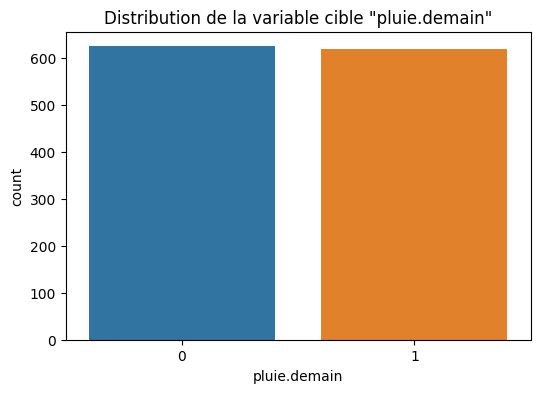

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x='pluie.demain', data=data_cleaned)
plt.title('Distribution de la variable cible "pluie.demain"')
plt.show()

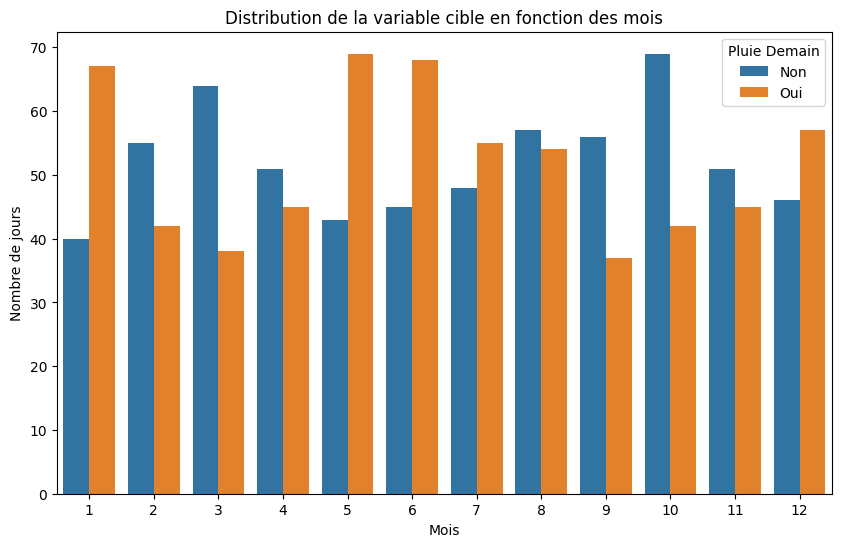

In [8]:
# Tracé de la variable "Month" en fonction de la variable cible "pluie.demain"
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='pluie.demain', data=data_cleaned)
plt.title('Distribution de la variable cible en fonction des mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de jours')
plt.legend(title='Pluie Demain', labels=['Non', 'Oui'])
plt.show()

In [ ]:
############## Compléter le code ################
# Compléter l'analyse exploratoire en considérant les autres variables explicatives


#################################################

## Modélisation avec la régression logistique

Nous allons maintenant appliquer une régression logistique sur le jeu de données pour prédire la probabilité de pleuvoir le lendemain. Pour ce faire, nous allons utiliser le package Python `statsmodels`. Contrairement aux packages de référence de machine learning, celui-ci permet d'effectuer des analyses statistiques avancées en fournissant des informations très détaillées sur le modèle.

Pour ajuster un modèle de régression logisitique aux données, nous allons suivre les étapes suivants :

* Encodage one hot de la variable `Month`: Il s'agit d'une variable catégorielle qu'il est nécessaire de transformer en variable binaire.

* Préparation des données : Les variables indépendantes et la variable dépendante sont séparées et une constante a été ajoutée aux variables indépendantes, qui correspond à l'intercept.

* Partitionnement des données : Deux jeux de données sont crées pour le train et le test.

* Création du modèle : Un modèle de régression logistique a été créé avec la méthode Logit.

* Entraînement du modèle : Le modèle a été entraîné avec les données.

* Résumé du modèle : Un résumé détaillé du modèle a été affiché, fournissant des informations sur les coefficients, leur significativité statistique, et d'autres métriques importantes.

In [14]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score

# Encodage One-Hot pour la variable 'Month'
data_encoded = pd.get_dummies(data_cleaned, columns=['Month'], drop_first=True)

# Séparation des variables indépendantes et dépendante
X = data_encoded.drop('pluie.demain', axis=1)
y = data_encoded['pluie.demain']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajout d'une constante aux ensembles d'entraînement et de test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Création et entraînement du modèle
model = sm.Logit(y_train, X_train)
result = model.fit()

# Prédiction sur l'ensemble de test
y_pred = result.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Évaluation de la performance
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_class))

# Affichage du résumé du modèle
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.524559
         Iterations 6
Accuracy: 0.6764705882352942
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       196
           1       0.67      0.62      0.65       178

    accuracy                           0.68       374
   macro avg       0.68      0.67      0.67       374
weighted avg       0.68      0.68      0.68       374

                           Logit Regression Results                           
Dep. Variable:           pluie.demain   No. Observations:                  870
Model:                          Logit   Df Residuals:                      818
Method:                           MLE   Df Model:                           51
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.2431
Time:                        22:37:59   Log-Likelihood:                -456.37
converged:                       True   LL-Null:                    

In [ ]:
############ Compléter le code ##############
# En se référant au résumé statistique du modèle précédent, entraîner un modèle de régression logistique
# plus parcimonieux (avec quelques variables seulement). Evaluer les performances du modèle en question.

#############################################